In [ ]:
#importing required libraries
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [ ]:
#Reading a single image just to see our color detection works or not
img=cv2.imread('/content/drive/My Drive/screen_shots_video_5/s1.jpg')
#img=cv2.imread('path to image')

In [ ]:
#converting the defaul BGR channel to RGB channel
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

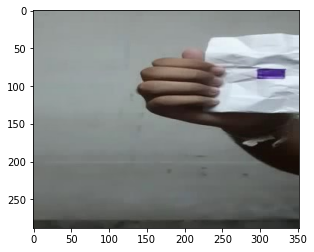

In [ ]:
#plotting the image
plt.imshow(img)

In [ ]:
#light_purple_1=(29,10,76)
#dark_purple_1=(69,50,116)
#picking the colors from the image that we need to detect
light_purple_1=(57,26,123)
dark_purple_1=(97,106,163)
light_purple=(39,9,95)
dark_purple=(79,49,135)

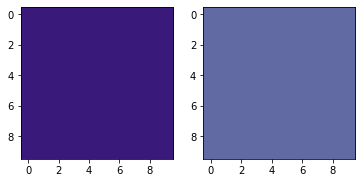

In [ ]:
#displaying the colors we have picked
lo_fill=np.full((10,10,3),light_purple_1,dtype='uint8')/255.0
do_fill=np.full((10,10,3),dark_purple_1,dtype='uint8')/255.0
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.imshow(lo_fill)
ax1=fig.add_subplot(1,2,2)
ax1.imshow(do_fill)

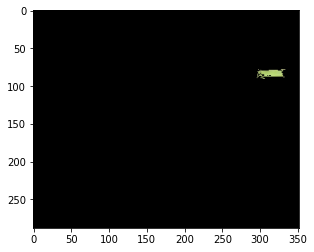

In [ ]:
#making the mask and applying it on the image to detect the color
mask2=cv2.inRange(img,light_purple,dark_purple) #making the mask
mask1=cv2.inRange(img,light_purple_1,dark_purple_1)
result=cv2.bitwise_and(img,img,mask=mask1)#applying the mask on the image using bitwise and
result=cv2.bitwise_not(result,result,mask=mask1)
plt.imshow(result)

In [ ]:
#files=os.listdir('/content/drive/My Drive/screen_shot_video_4/')

In [ ]:
#making the function to read the image from folder where it is stored
def imge(i):
    img=cv2.imread('/content/drive/My Drive/screen_shots_video_5/s{}.jpg'.format(i))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [ ]:
#making the function to apply mask on all the images
def mask(img,i):
  if(i<=30):
    mask1=cv2.inRange(img,light_purple_1,dark_purple_1)
    result=cv2.bitwise_and(img,img,mask=mask1)
    result=cv2.bitwise_not(result,result,mask=mask1)
  elif(i>30):
    mask2=cv2.inRange(img,light_purple,dark_purple)
    result=cv2.bitwise_and(img,img,mask=mask2)
    result=cv2.bitwise_not(result,result,mask=mask2)
  return result

In [ ]:
def final__img():
  final_img=[]
  for i in range(1,61):
    img=imge(i)
    result=mask(img,i)
    final_img.append(result)
  return final_img


In [ ]:
final_img=final__img()
final_image=sum(final_img)
final_image.shape
final_image=final_image.astype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


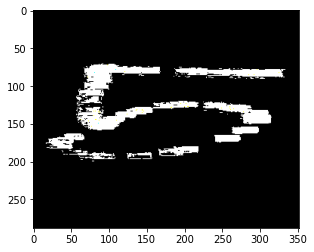

In [ ]:
plt.imshow(final_image,cmap='gray')

In [ ]:
#download the image and crop it and resize it to 28x28
#as the classifier work only images with size (28x28)

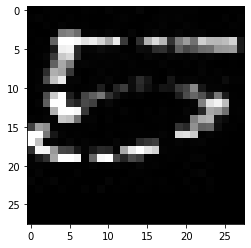

In [ ]:
crop_image=cv2.imread('/content/drive/My Drive/screen_shots_video_5/test_5.jpg')
crop_image=crop_image[:,:,1]
plt.imshow(crop_image,cmap='gray')

In [ ]:
#making model for image classification

In [ ]:
#imporing libraries for classifier
import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,BatchNormalization,Activation,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
#loading data for classifier
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


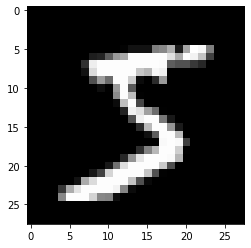

In [ ]:
#preprocessing data 
plt.imshow(x_train[0],cmap='gray')
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [ ]:
#defining model
def model():
    model=Sequential([
                  Conv2D(16,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),padding='same',kernel_initializer='he_uniform'),
                  BatchNormalization(),
                  Activation('relu'),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dropout(0.2),
                  Dense(512,activation='relu'),
                  Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)
    return model,history

In [ ]:
#as the model is alreadly trained we load the model in the loaded_model
loaded_model=tf.keras.models.load_model('/content/drive/My Drive/digit_recognizer_model.h5')

In [ ]:
#x_trin=np.expand_dims(x_train[5],0)

In [ ]:
crop_image=np.expand_dims(crop_image,-1)
crop_image=crop_image.astype('float32')
pred_img=np.expand_dims(crop_image,0)
prediction=loaded_model.predict_classes(pred_img)
print('The number you have shown me is {}'.format(prediction[0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The number you have shown me is 5
